In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [8]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [9]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
r = model.fit(train_dataset,
         epochs = 5,
         validation_data = test_dataset)

Epoch 1/5


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 480ms/step - accuracy: 0.7939 - loss: 0.4209 - val_accuracy: 0.7794 - val_loss: 0.5207
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.9485 - loss: 0.1618 - val_accuracy: 0.9118 - val_loss: 0.3049
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - accuracy: 0.9455 - loss: 0.1633 - val_accuracy: 0.8824 - val_loss: 0.2775
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 329ms/step - accuracy: 0.9617 - loss: 0.1094 - val_accuracy: 0.9412 - val_loss: 0.2426
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 327ms/step - accuracy: 0.9490 - loss: 0.1529 - val_accuracy: 0.8529 - val_loss: 0.2786


In [13]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [14]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [15]:
print(len(predictions))

68


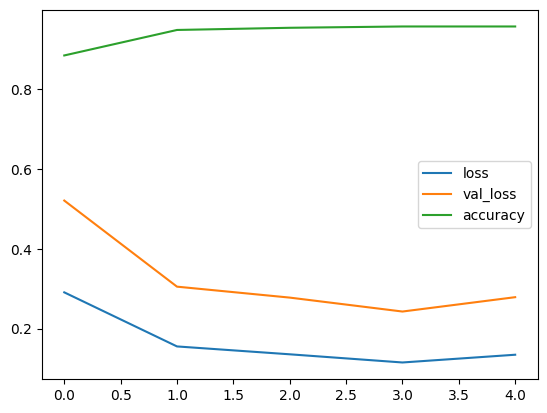

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

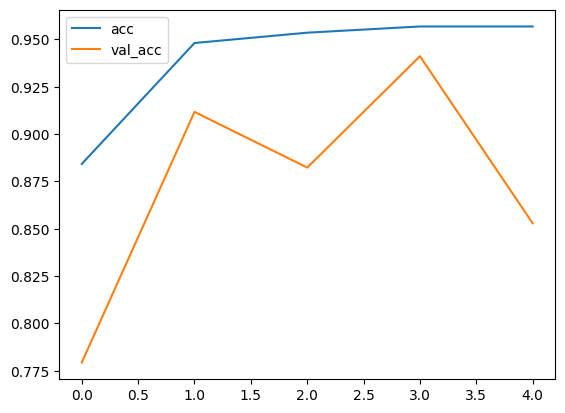

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.]]


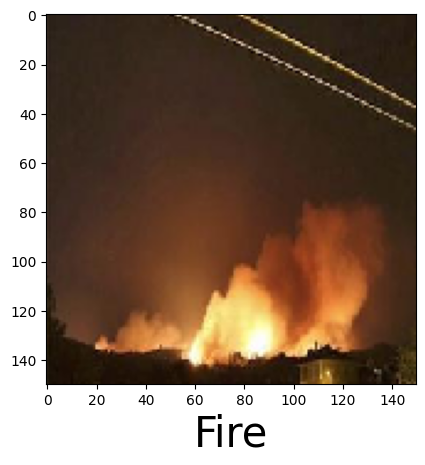

In [23]:
predictImage("Testing/fire/abc190.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.]]


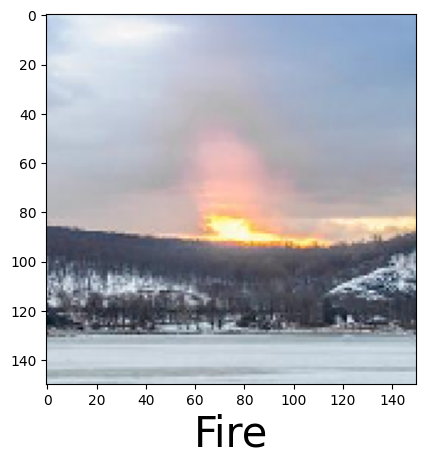

In [25]:
predictImage('Testing/fire/abc184.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[1.]]


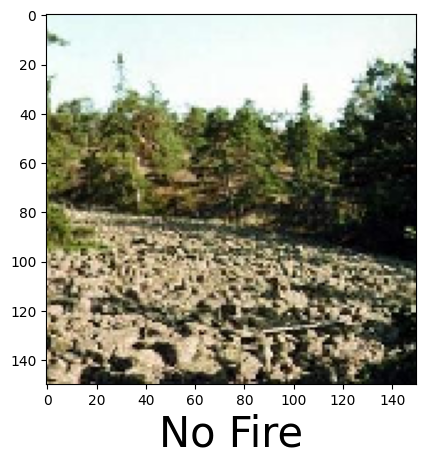

In [27]:
predictImage('Testing/nofire/abc369.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[4.788749e-30]]


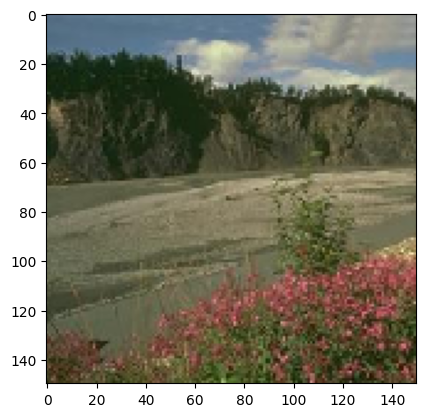

In [28]:
predictImage('Testing/nofire/abc344.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.]]


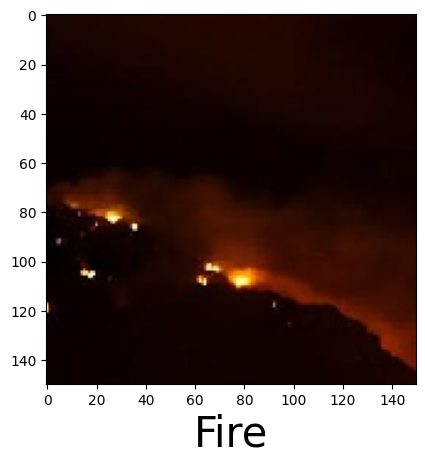

In [29]:
predictImage('Testing/fire/abc172.jpg')